<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

The house pricing is increasing every year. Each home buyer has their own characteristics when they are looking for a house. Before the coronavirus pandemic the house pricing was increasing slightly from year to year but after the pandemic the house pricing was increasing faster than normal. The purpose of this project is to create a model using the Ames Housing Dataset to identify which characteristics have an impact on house pricing and explore the change in sale price.


### Contents:
- [Background](#Background)
- [Train Data Cleaning and EDA](#Train-Data-Cleaning-and-EDA)
- [Test Data Cleaning](#Test-Data-Cleaning)
- [Preprocessing and Modeling (on different notebook)](#Preprocessing-and-Modeling(on-different-notebook))
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background 
Every home buyer will have their own criteria for their house based on their income and living goal. There are some common criteria for home buyers when they are looking for a house. The first criteria is the price followed by location, house condition, square footage, home type, space, outside space and and other different criterias.([*source*](https://www.forbes.com/advisor/mortgages/real-estate/what-to-look-for-when-buying-a-house/))

The materials to build houses are limited and the number of home buyers are increasing. Those reasons cause house pricing to increase after the pandemic.([*Read this for more information.*](https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/))

Iowa is one of the first 10 states that have lowest house pricing. Iowa is a state in the Midwest of the United States and Ames is a city of Iowa. Due to the weather condition, Iowa’s houses have a basement. The basement is known as a shelter and one of the characteristics buyers look for.([*source*](https://lovehomedesigns.com/where-are-basements-common/#:~:text=On%20average%2C%20in%20the%20United,%2C%20Oklahoma%2C%20Iowa%2C%20Missouri.)). Besides the basement, home buyers are also looking for different characteristics, for example, when the house was built or remodeled. 


### Dataset 

* [`train.csv`]('../datasets/train.csv'): Ames Housing Dataset
* [`test.csv`]('../datasets/test.csv'): Ames Housing Dataset without sale price

**Brief description of the contents for each dataset.**

The train dataset have 80 columns are criteria of a house and the last column is sale price.
The test dataset have 80 columns are criteria of a house.

Read this for each criteria description. ([data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))



## Train Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# Convert all columns to lowercase and replace spaces in column names.
train.columns = train.columns.str.lower().str.replace(' ', '_')
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
# filter columns that have data is float or int

numeric_cols = list(train._get_numeric_data().columns)
numeric_cols

['id',
 'pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'saleprice']

In [8]:
#choose numeric columns that have the correlation to saleprice that above 0.5

corr_columns = [a for a in numeric_cols if train[a].corr(train['saleprice']) > 0.5]
corr_columns       

['overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'saleprice']

In [9]:
#list of numeric columns that will be drop

[col for col in numeric_cols if col not in corr_columns]     

['id',
 'pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'overall_cond',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'fireplaces',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold']

In [10]:
## Fill Missing Values
for col in corr_columns:
    train[col] = train[col].fillna(train[col].mean())

In [11]:
train[corr_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall_qual    2051 non-null   int64  
 1   year_built      2051 non-null   int64  
 2   year_remod/add  2051 non-null   int64  
 3   mas_vnr_area    2051 non-null   float64
 4   total_bsmt_sf   2051 non-null   float64
 5   1st_flr_sf      2051 non-null   int64  
 6   gr_liv_area     2051 non-null   int64  
 7   full_bath       2051 non-null   int64  
 8   totrms_abvgrd   2051 non-null   int64  
 9   garage_yr_blt   2051 non-null   float64
 10  garage_cars     2051 non-null   float64
 11  garage_area     2051 non-null   float64
 12  saleprice       2051 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 208.4 KB


In [13]:
# list of object column, choose random features that seem interesting.

list(train.select_dtypes('object').columns.values)

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type']

In [28]:
train.drop(columns= ['pid','ms_subclass','lot_frontage','lot_area','overall_cond',
                     'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','2nd_flr_sf',
                     'low_qual_fin_sf','bsmt_full_bath','bsmt_half_bath','half_bath',
                     'bedroom_abvgr','kitchen_abvgr','fireplaces','wood_deck_sf',
                     'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                     'pool_area','misc_val','mo_sold','yr_sold','ms_zoning','street',
                     'alley','utilities','neighborhood','condition_2','exterior_1st',
                     'exterior_2nd','mas_vnr_type','heating_qc','garage_qual','paved_drive', 
                     'pool_qc','fence','misc_feature','sale_type','fireplace_qu','roof_matl',
                     'bsmt_cond','heating','electrical','functional','kitchen_qual'
                    ],axis = 1, inplace=True )

In [29]:
list(train.select_dtypes('object').columns.values)

['lot_shape',
 'land_contour',
 'lot_config',
 'land_slope',
 'condition_1',
 'bldg_type',
 'house_style',
 'roof_style',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'central_air',
 'garage_type',
 'garage_finish',
 'garage_cond']

In [30]:
## Fill Missing Values
for col in list(train.select_dtypes('object').columns.values):
    train[col] = train[col].fillna(train[col].mode()[0])

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2051 non-null   int64  
 1   lot_shape       2051 non-null   object 
 2   land_contour    2051 non-null   object 
 3   lot_config      2051 non-null   object 
 4   land_slope      2051 non-null   object 
 5   condition_1     2051 non-null   object 
 6   bldg_type       2051 non-null   object 
 7   house_style     2051 non-null   object 
 8   overall_qual    2051 non-null   int64  
 9   year_built      2051 non-null   int64  
 10  year_remod/add  2051 non-null   int64  
 11  roof_style      2051 non-null   object 
 12  mas_vnr_area    2051 non-null   float64
 13  exter_qual      2051 non-null   object 
 14  exter_cond      2051 non-null   object 
 15  foundation      2051 non-null   object 
 16  bsmt_qual       2051 non-null   object 
 17  bsmt_exposure   2051 non-null   o

In [32]:
ohe = OneHotEncoder(drop='first')


In [33]:
ohe.fit(train[['lot_shape','land_contour','lot_config','land_slope','condition_1',
               'bldg_type','house_style','roof_style','exter_qual',
               'exter_cond','foundation','bsmt_qual','bsmt_exposure',
               'bsmtfin_type_1','bsmtfin_type_2','central_air',
               'garage_type','garage_finish','garage_cond']])

OneHotEncoder(drop='first')

In [34]:
ohe_data = ohe.transform(train[['lot_shape','land_contour','lot_config','land_slope','condition_1',
               'bldg_type','house_style','roof_style','exter_qual',
               'exter_cond','foundation','bsmt_qual','bsmt_exposure',
               'bsmtfin_type_1','bsmtfin_type_2','central_air',
               'garage_type','garage_finish','garage_cond']])

In [35]:
ohe_train = pd.DataFrame(ohe_data.todense(), columns=ohe.get_feature_names_out())
ohe_train.head()

,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
train_trans = pd.merge(train[['id','overall_qual','year_built','year_remod/add','mas_vnr_area','total_bsmt_sf',
                              '1st_flr_sf','gr_liv_area','full_bath','totrms_abvgrd','garage_yr_blt',
                              'garage_cars','garage_area','saleprice']],
                       ohe_train, left_index=True, right_index=True)
train_trans.head(3)

,id,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA
0,109,6,1976,2005,289.0,725.0,725,1479,2,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,544,7,1996,1997,132.0,913.0,913,2122,2,8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,153,5,1953,2007,0.0,1057.0,1057,1057,1,5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
train_trans.shape

(2051, 91)

In [38]:
train_trans.to_csv('../datasets/train_cleaning.csv', index=False)

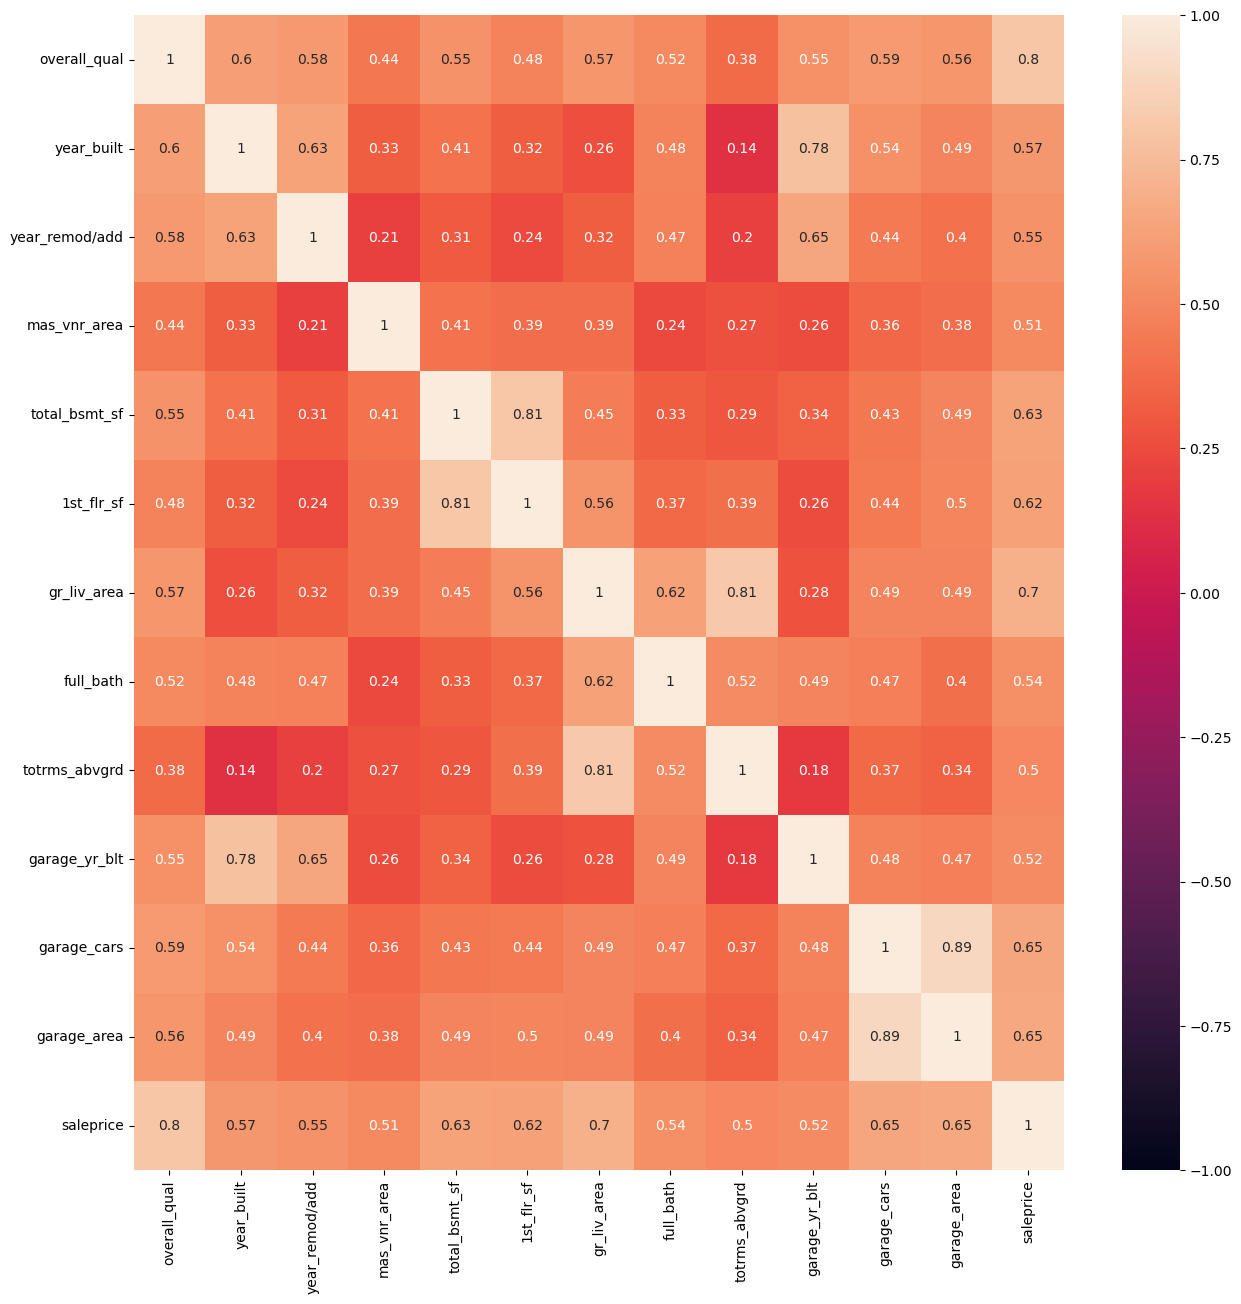

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(train_trans[['overall_qual','year_built','year_remod/add','mas_vnr_area','total_bsmt_sf',
                              '1st_flr_sf','gr_liv_area','full_bath','totrms_abvgrd','garage_yr_blt',
                              'garage_cars','garage_area','saleprice']].corr(), annot = True, vmax= 1, vmin=-1);

### The corralation of each feature over 0.5 compare to each other and sale price.
### The overall material and finish of the house (overall_qual) have the highest corralation with sale price.


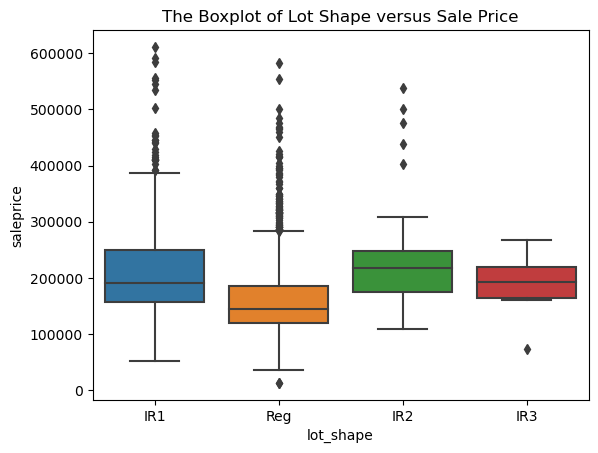

In [42]:

sns.boxplot(data = train, x='lot_shape',y='saleprice')
plt.title('The Boxplot of Lot Shape versus Sale Price');

### IR1 (Slightly irregular), Reg (Regular), IR2 (Moderately Irregular) are have higher sale price than IR3 (Irregular)

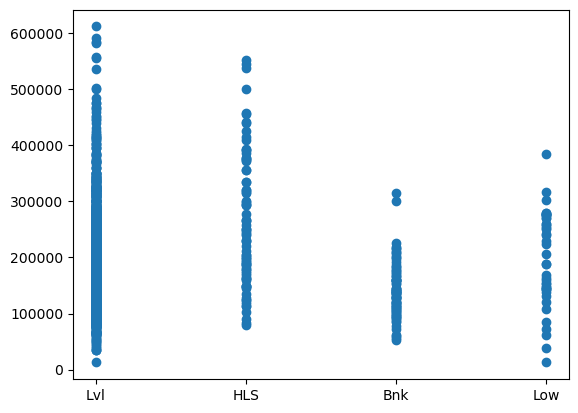

In [23]:
plt.scatter(train['land_contour'],train['saleprice'])

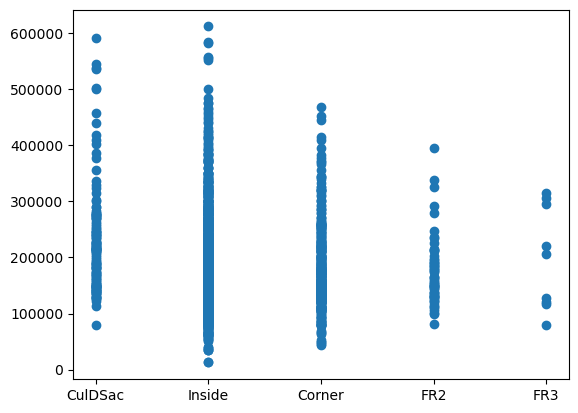

In [24]:
plt.scatter(train['lot_config'],train['saleprice'])

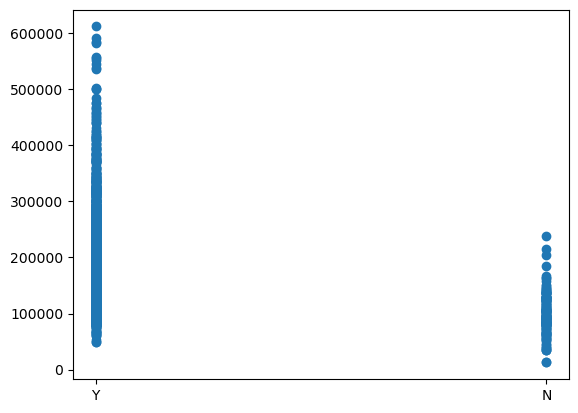

In [25]:
plt.scatter(train['central_air'],train['saleprice'])

In [71]:
# list of sale price from 1995 to 2010

year_built_1994 = train.loc[train['year_built'] > 1994, ['year_built','saleprice']]

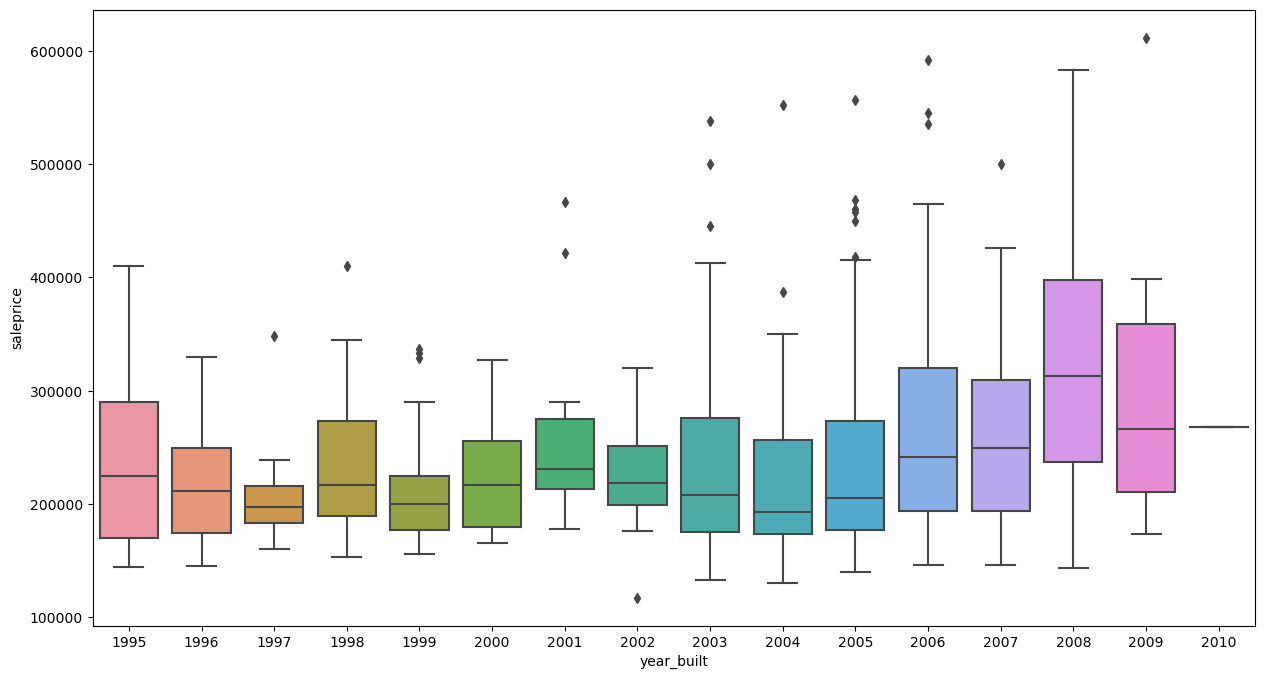

In [73]:
plt.figure(figsize=(15,8))
sns.boxplot(data=year_built_1994, x= 'year_built', y = 'saleprice');

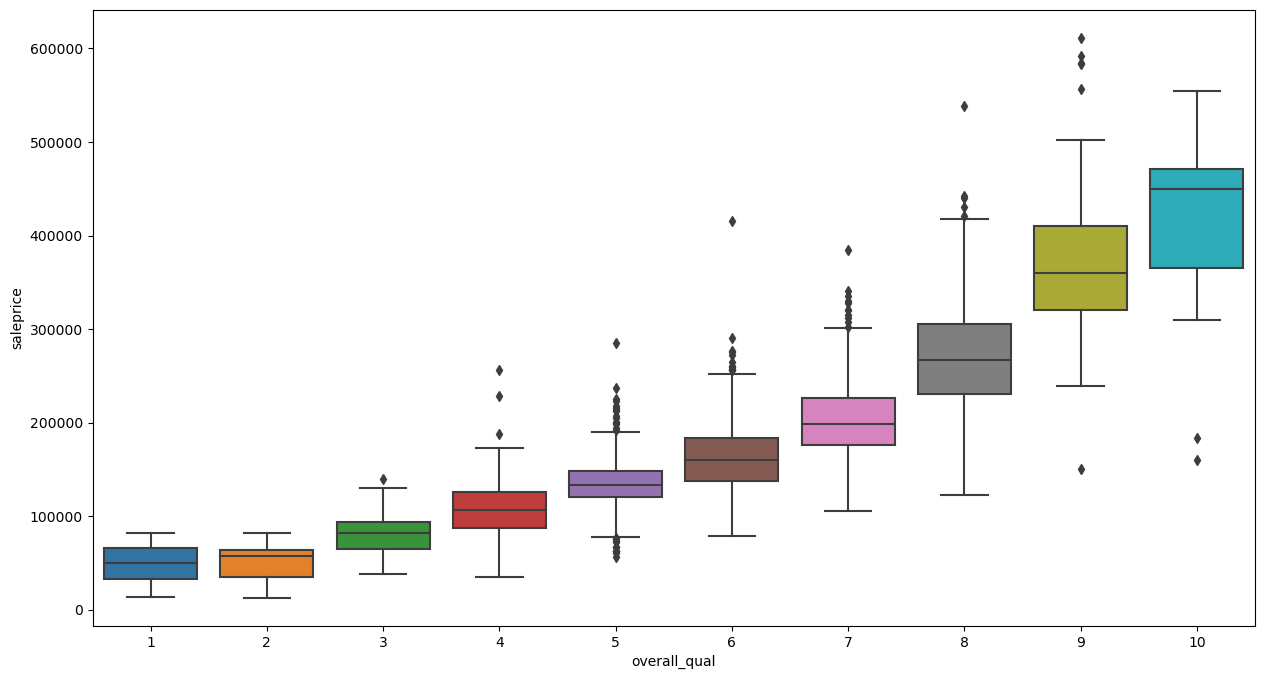

In [76]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x= 'overall_qual', y = 'saleprice');

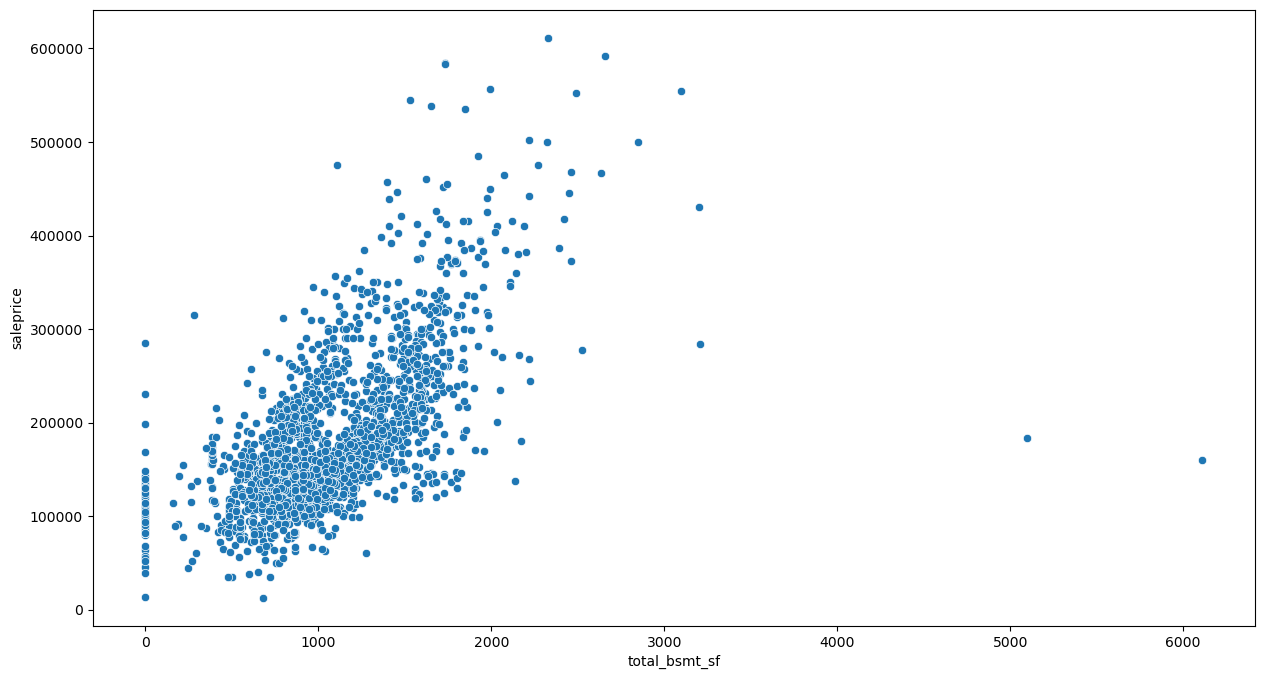

In [79]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=train, x= 'total_bsmt_sf', y = 'saleprice');

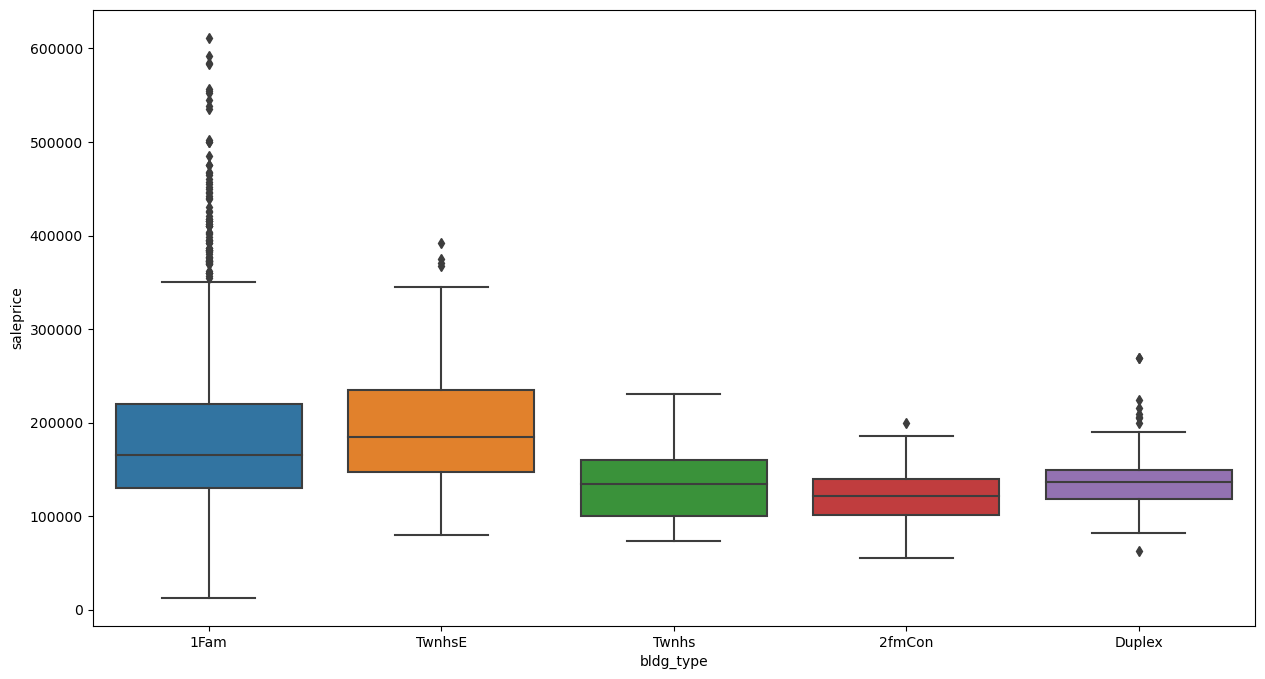

In [80]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x= 'bldg_type', y = 'saleprice');

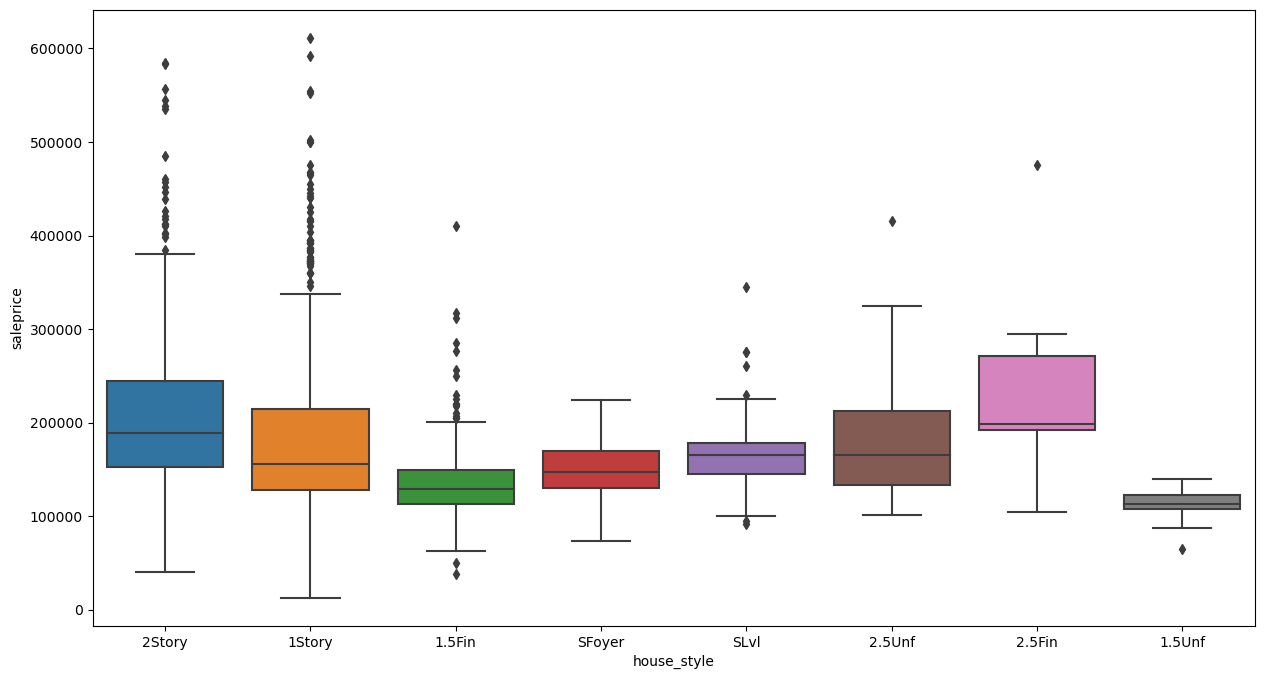

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x= 'house_style', y = 'saleprice');

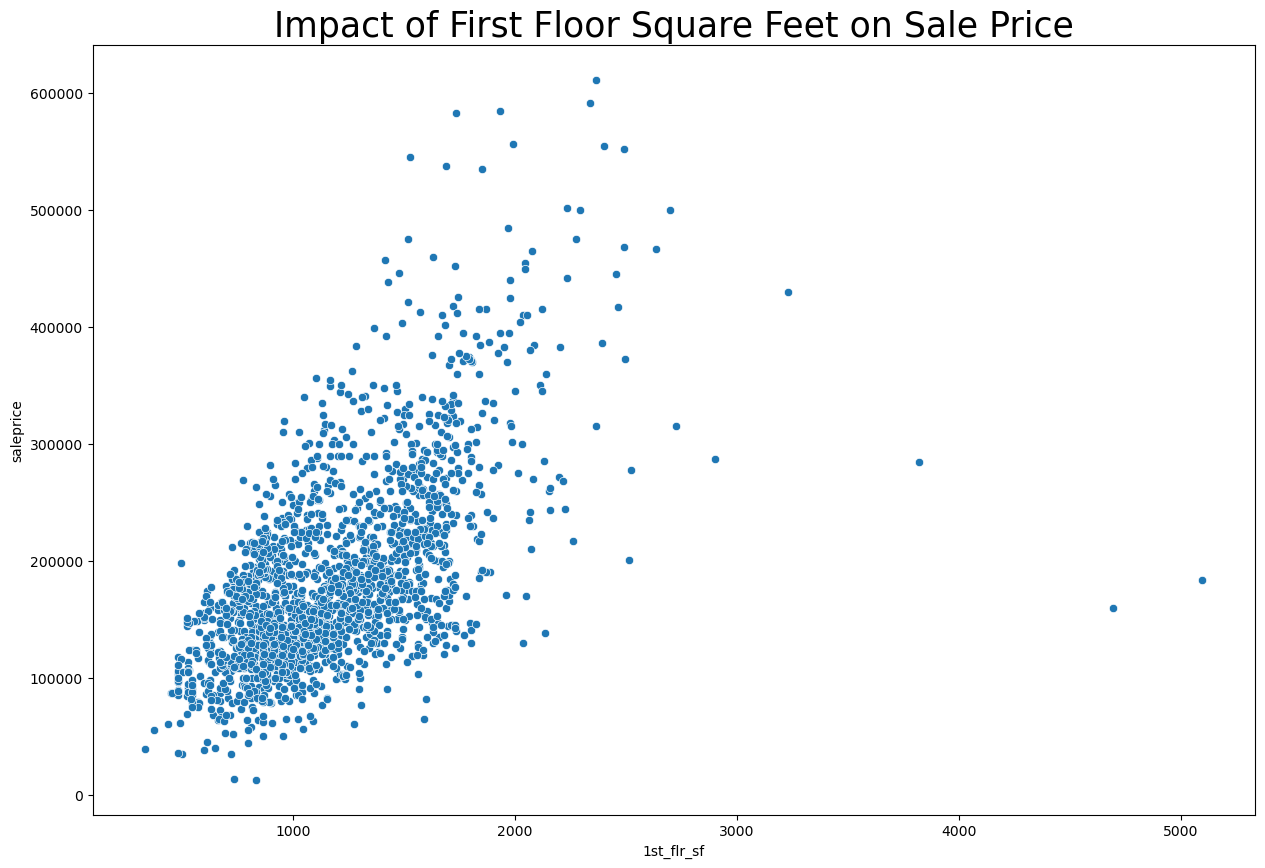

In [92]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train, x = '1st_flr_sf' , y = 'saleprice')
plt.title('Scatterplot of First Floor Square Feet versus Sale Price', size = 25);

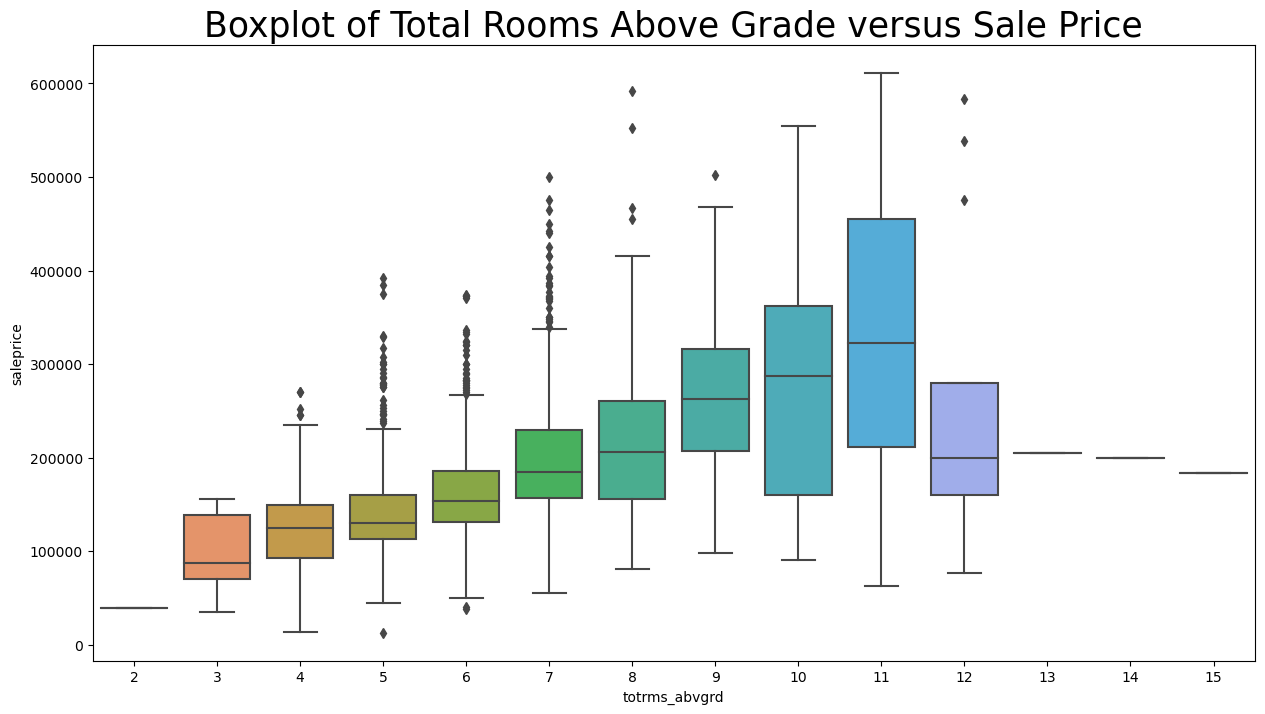

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x= 'totrms_abvgrd', y = 'saleprice')
plt.title('Boxplot of Total Rooms Above Grade versus Sale Price', size=(25));

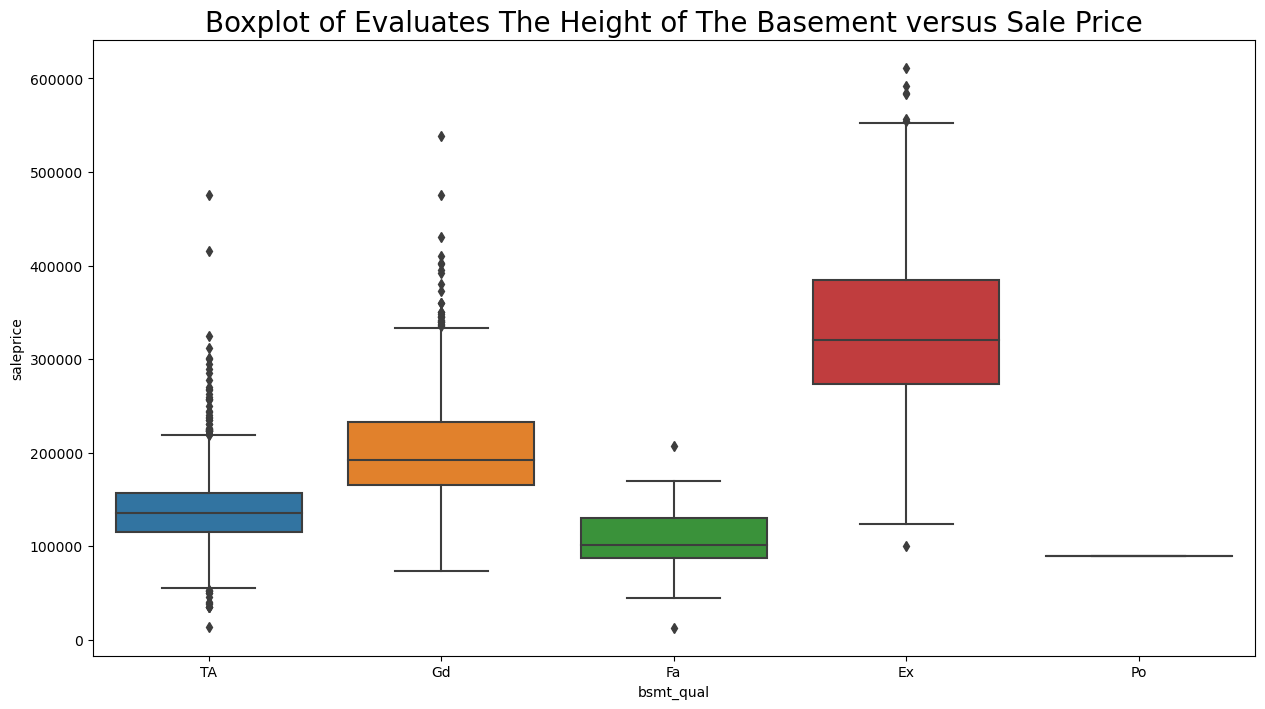

In [97]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x= 'bsmt_qual', y = 'saleprice')
plt.title('Boxplot of Evaluates The Height of The Basement versus Sale Price', size=(20));

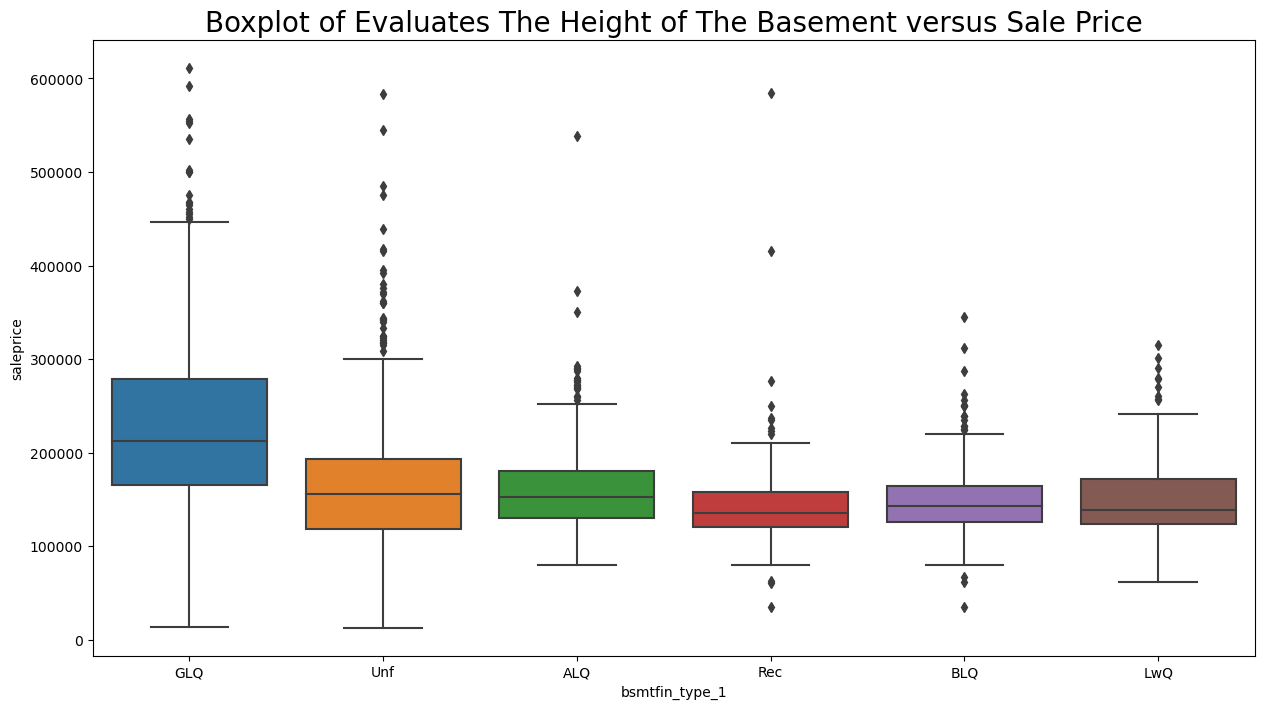

In [101]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x= 'bsmtfin_type_1', y = 'saleprice')
plt.title('Boxplot of Evaluates The Height of The Basement versus Sale Price', size=(20));

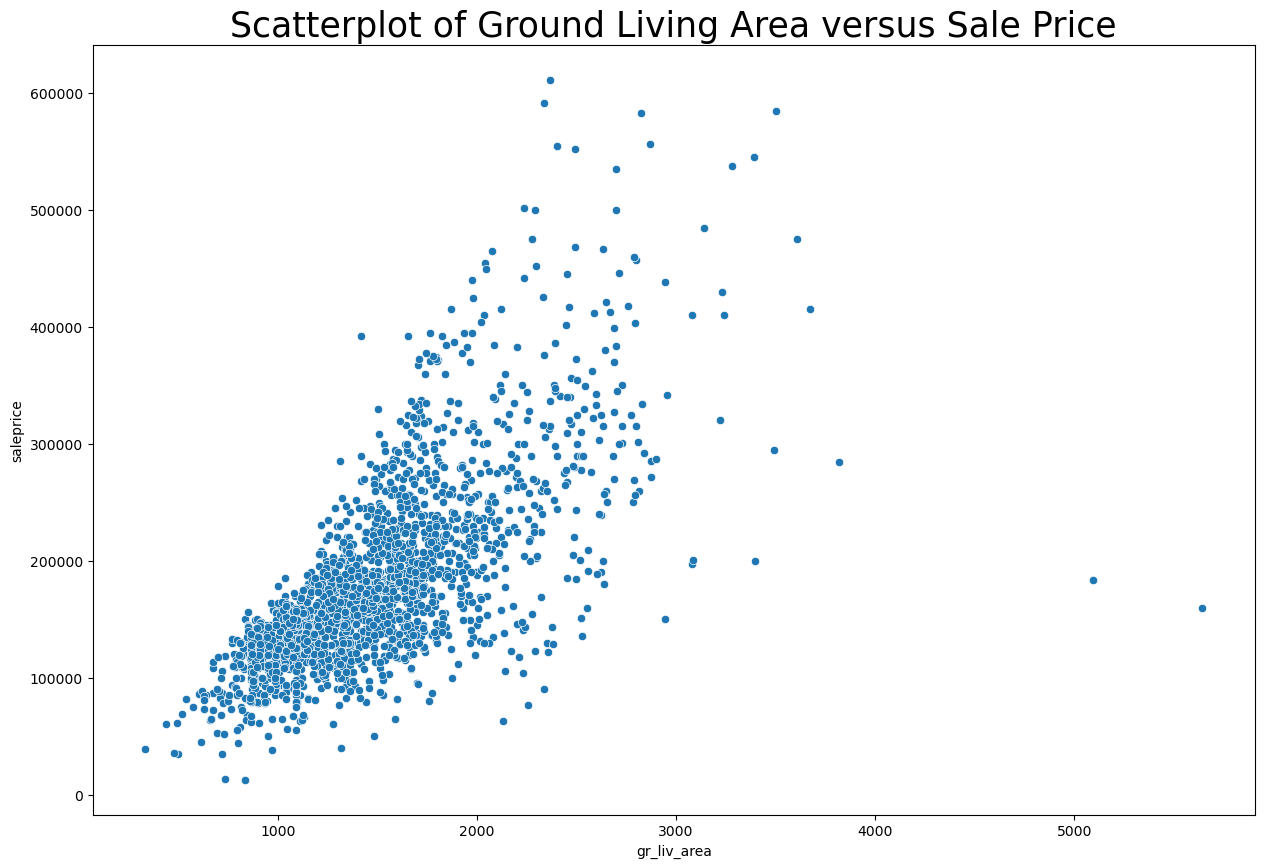

In [103]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train, x = 'gr_liv_area' , y = 'saleprice')
plt.title('Scatterplot of Ground Living Area versus Sale Price', size = 25);

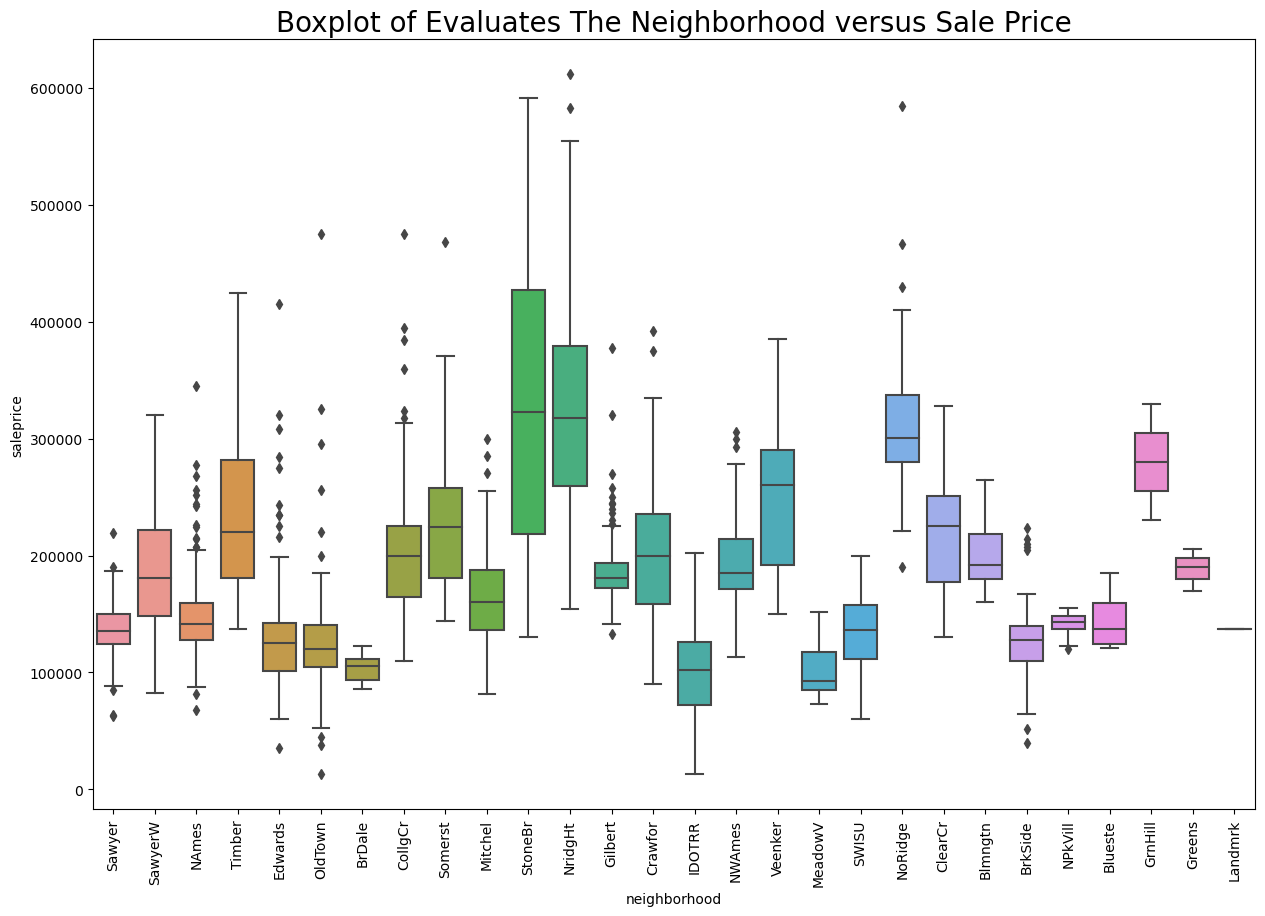

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train, x= 'neighborhood', y = 'saleprice')
plt.title('Boxplot of Evaluates The Neighborhood versus Sale Price', size=(20))
plt.xticks(rotation = 90);

## Test Data Cleaning

In [27]:
test = pd.read_csv('../datasets/test.csv')

In [28]:
# Convert all columns to lowercase and replace spaces in column names.
test.columns = test.columns.str.lower().str.replace(' ', '_')
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [29]:
test.drop(columns= ['pid','ms_subclass','lot_frontage','lot_area','overall_cond',
                     'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','2nd_flr_sf',
                     'low_qual_fin_sf','bsmt_full_bath','bsmt_half_bath','half_bath',
                     'bedroom_abvgr','kitchen_abvgr','fireplaces','wood_deck_sf',
                     'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                     'pool_area','misc_val','mo_sold','yr_sold','ms_zoning','street',
                     'alley','utilities','neighborhood','condition_2','exterior_1st',
                     'exterior_2nd','mas_vnr_type','heating_qc','garage_qual','paved_drive', 
                     'pool_qc','fence','misc_feature','sale_type','fireplace_qu','roof_matl',
                     'bsmt_cond','heating','electrical','functional','kitchen_qual'
                    ],axis = 1, inplace=True )

In [30]:
for col in list(test.select_dtypes('object').columns.values):
    test[col] = test[col].fillna(test[col].mode()[0])

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              878 non-null    int64  
 1   lot_shape       878 non-null    object 
 2   land_contour    878 non-null    object 
 3   lot_config      878 non-null    object 
 4   land_slope      878 non-null    object 
 5   condition_1     878 non-null    object 
 6   bldg_type       878 non-null    object 
 7   house_style     878 non-null    object 
 8   overall_qual    878 non-null    int64  
 9   year_built      878 non-null    int64  
 10  year_remod/add  878 non-null    int64  
 11  roof_style      878 non-null    object 
 12  mas_vnr_area    877 non-null    float64
 13  exter_qual      878 non-null    object 
 14  exter_cond      878 non-null    object 
 15  foundation      878 non-null    object 
 16  bsmt_qual       878 non-null    object 
 17  bsmt_exposure   878 non-null    obj

In [56]:
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(test['mas_vnr_area'].mean())
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(test['garage_yr_blt'].mean())

In [57]:
ohe.fit(test[['lot_shape','land_contour','lot_config','land_slope','condition_1',
               'bldg_type','house_style','roof_style','exter_qual',
               'exter_cond','foundation','bsmt_qual','bsmt_exposure',
               'bsmtfin_type_1','bsmtfin_type_2','central_air',
               'garage_type','garage_finish','garage_cond']])

OneHotEncoder(drop='first')

In [58]:
ohe_data_test = ohe.transform(test[['lot_shape','land_contour','lot_config','land_slope','condition_1',
               'bldg_type','house_style','roof_style','exter_qual',
               'exter_cond','foundation','bsmt_qual','bsmt_exposure',
               'bsmtfin_type_1','bsmtfin_type_2','central_air',
               'garage_type','garage_finish','garage_cond']])

In [59]:
ohe_test = pd.DataFrame(ohe_data_test.todense(), columns=ohe.get_feature_names_out())
ohe_test.head()

,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
test_trans = pd.merge(test[['overall_qual','year_built','year_remod/add','mas_vnr_area','total_bsmt_sf',
                              '1st_flr_sf','gr_liv_area','full_bath','totrms_abvgrd','garage_yr_blt',
                              'garage_cars','garage_area']],
                       ohe_test, left_index=True, right_index=True)
test_trans.head(3)

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA
0,6,1910,1950,0.0,1020,908,1928,2,9,1910.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5,1977,1977,0.0,1967,1967,1967,2,10,1977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,2006,2006,0.0,654,664,1496,2,7,2006.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [61]:
test_trans.shape

(878, 89)

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              878 non-null    int64  
 1   lot_shape       878 non-null    object 
 2   land_contour    878 non-null    object 
 3   lot_config      878 non-null    object 
 4   land_slope      878 non-null    object 
 5   condition_1     878 non-null    object 
 6   bldg_type       878 non-null    object 
 7   house_style     878 non-null    object 
 8   overall_qual    878 non-null    int64  
 9   year_built      878 non-null    int64  
 10  year_remod/add  878 non-null    int64  
 11  roof_style      878 non-null    object 
 12  mas_vnr_area    878 non-null    float64
 13  exter_qual      878 non-null    object 
 14  exter_cond      878 non-null    object 
 15  foundation      878 non-null    object 
 16  bsmt_qual       878 non-null    object 
 17  bsmt_exposure   878 non-null    obj

In [63]:
test_trans.isnull().sum()

overall_qual         0
year_built           0
year_remod/add       0
mas_vnr_area         0
total_bsmt_sf        0
                    ..
garage_finish_Unf    0
garage_cond_Fa       0
garage_cond_Gd       0
garage_cond_Po       0
garage_cond_TA       0
Length: 89, dtype: int64

In [64]:
test_trans.to_csv('../datasets/test_cleaning.csv', index=False)

## Evaluation and Conceptual Understanding

## Conclusions and Recommendations